# word2vec

## Initialize

In [1]:
%%bash

cp /content/drive/MyDrive/wiki.txt.zip /content
unzip /content/wiki.txt.zip
rm /content/wiki.txt.zip

Archive:  /content/wiki.txt.zip
  inflating: wiki.txt                


In [3]:
# preprocess wiki.txt and write to new file wiki_preprocess.txt
%%time
from utils import preprocess_raw_text
preprocess_raw_text('/content/wiki.txt', '/content/wiki_processed.txt')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
1  million sentences processed.
2  million sentences processed.
3  million sentences processed.
4  million sentences processed.
5  million sentences processed.
6  million sentences processed.
7  million sentences processed.
8  million sentences processed.
9  million sentences processed.
10  million sentences processed.
11  million sentences processed.
12  million sentences processed.
13  million sentences processed.
14  million sentences processed.
15  million sentences processed.
16  million sentences processed.
17  million sentences processed.
18  million sentences processed.
19  million sentences processed.
20  million sentences processed.
21  million sentences proces

## Train

In [ ]:
!python train.py --data 'wiki_processed.txt' \
--preprocess 'dataset.pkl' \
--embed-dim 200 \
--batch-size 10000 \
--epoch 1 \
--lr 0.01 \
--window-size 2 \
--min-freq 5 \
--neg-sample 5 \
--wordsim 'combined.csv'

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
Epoch: 0/1 	 Batch: 0 	 Loss: 1.35532  	 Spearman: 0.03017  	 Time_taken: 29.1307 seconds
Epoch: 0/1 	 Batch: 10000 	 Loss: 0.92832  	 Spearman: 0.01936  	 Time_taken: 29.17888 seconds
Epoch: 0/1 	 Batch: 20000 	 Loss: 0.85108  	 Spearman: 0.09428  	 Time_taken: 29.42053 seconds
Epoch: 0/1 	 Batch: 30000 	 Loss: 0.79585  	 Spearman: 0.1225  	 Time_taken: 29.68366 seconds
Epoch: 0/1 	 Batch: 40000 	 Loss: 0.75745  	 Spearman: 0.13439  	 Time_taken: 29.49893 seconds
Epoch: 0/1 	 Batch: 50000 	 Loss: 0.75451  	 Spearman: 0.18603  	 Time_taken: 29.47913 seconds
Epoch: 0/1 	 Batch: 60000 	 Loss: 0.72956  	 Spearman: 0.18595  	 Time_taken: 29.62742 seco

In [ ]:
!python train.py --data 'wiki_processed.txt' \
--preprocess 'dataset.pkl' \
--embed-dim 300 \
--batch-size 10000 \
--epoch 1 \
--lr 0.01 \
--window-size 2 \
--min-freq 5 \
--neg-sample 5 \
--wordsim 'combined.csv'

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
Epoch: 1/1 	 Batch: 0 	 Loss: 1.42974  	 Spearman: 0.02923  	 Time_taken: 31.00215 seconds
Epoch: 1/1 	 Batch: 10000 	 Loss: 1.01885  	 Spearman: 0.02154  	 Time_taken: 30.39033 seconds
Epoch: 1/1 	 Batch: 20000 	 Loss: 0.91938  	 Spearman: 0.06679  	 Time_taken: 30.40612 seconds
Epoch: 1/1 	 Batch: 30000 	 Loss: 0.85706  	 Spearman: 0.19317  	 Time_taken: 30.54525 seconds
Epoch: 1/1 	 Batch: 40000 	 Loss: 0.80865  	 Spearman: 0.1201  	 Time_taken: 30.12028 seconds
Epoch: 1/1 	 Batch: 50000 	 Loss: 0.80633  	 Spearman: 0.18798  	 Time_taken: 30.15486 seconds
Epoch: 1/1 	 Batch: 60000 	 Loss: 0.77683  	 Spearman: 0.16806  	 Time_taken: 30.65678 seconds
Epoch: 1/1 	 Batch:

## Test

In [6]:
import numpy as np
from utils import calc_spearman_coef, load_pickle
dataset = load_pickle('dataset.pkl')
embeddings = np.load('spearman_100_large.npy')
score = calc_spearman_coef("combined.csv", word2idx=dataset.word2idx, embeddings=embeddings)
print("Score: " + str(score)) 

Score: 0.6018618280254777


## Visualization

### Training graph

In [ ]:
from utils import load_pickle
import matplotlib.pyplot as plt

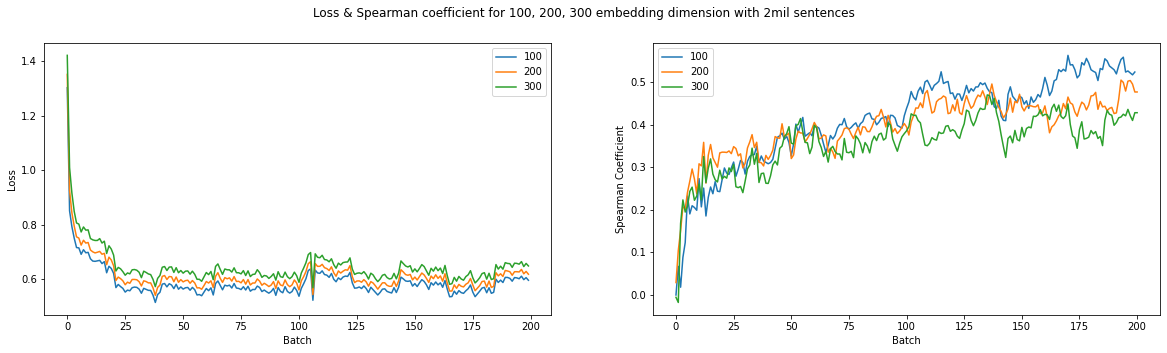

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(load_pickle('loss_history_100.pkl'))
plt.plot(load_pickle('loss_history_200.pkl'))
plt.plot(load_pickle('loss_history_300.pkl'))
plt.legend([100, 200, 300])
plt.ylabel('Loss')
plt.xlabel('Batch')

plt.subplot(1,2,2)
plt.plot(load_pickle('spearman_history_100.pkl'))
plt.plot(load_pickle('spearman_history_200.pkl'))
plt.plot(load_pickle('spearman_history_300.pkl'))
plt.legend([100, 200, 300])
plt.ylabel('Spearman Coefficient')
plt.xlabel('Batch')

plt.suptitle('Loss & Spearman coefficient for 100, 200, 300 embedding dimension with 2mil sentences')
plt.show()

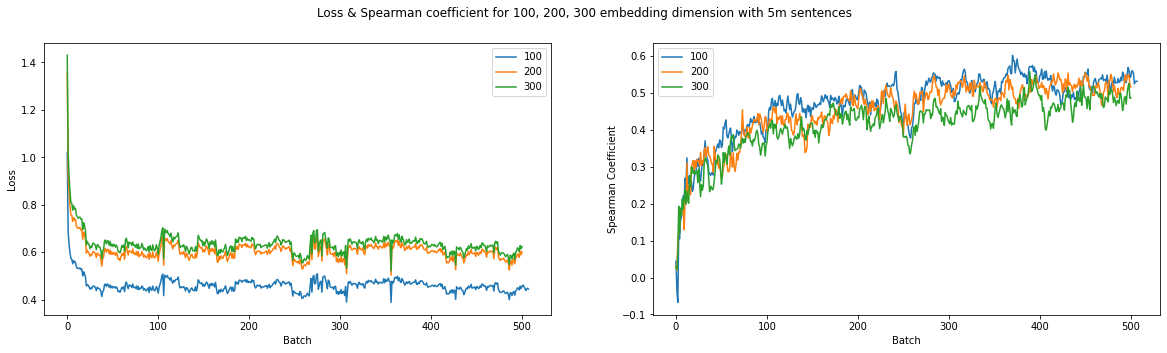

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(load_pickle('loss_history_100_large.pkl'))
plt.plot(load_pickle('loss_history_200_large.pkl'))
plt.plot(load_pickle('loss_history_300_large.pkl'))
plt.legend([100, 200, 300])
plt.ylabel('Loss')
plt.xlabel('Batch')

plt.subplot(1,2,2)
plt.plot(load_pickle('spearman_history_100_large.pkl'))
plt.plot(load_pickle('spearman_history_200_large.pkl'))
plt.plot(load_pickle('spearman_history_300_large.pkl'))
plt.legend([100, 200, 300])
plt.ylabel('Spearman Coefficient')
plt.xlabel('Batch')

plt.suptitle('Loss & Spearman coefficient for 100, 200, 300 embedding dimension with 5m sentences')
plt.show()

### TSNE

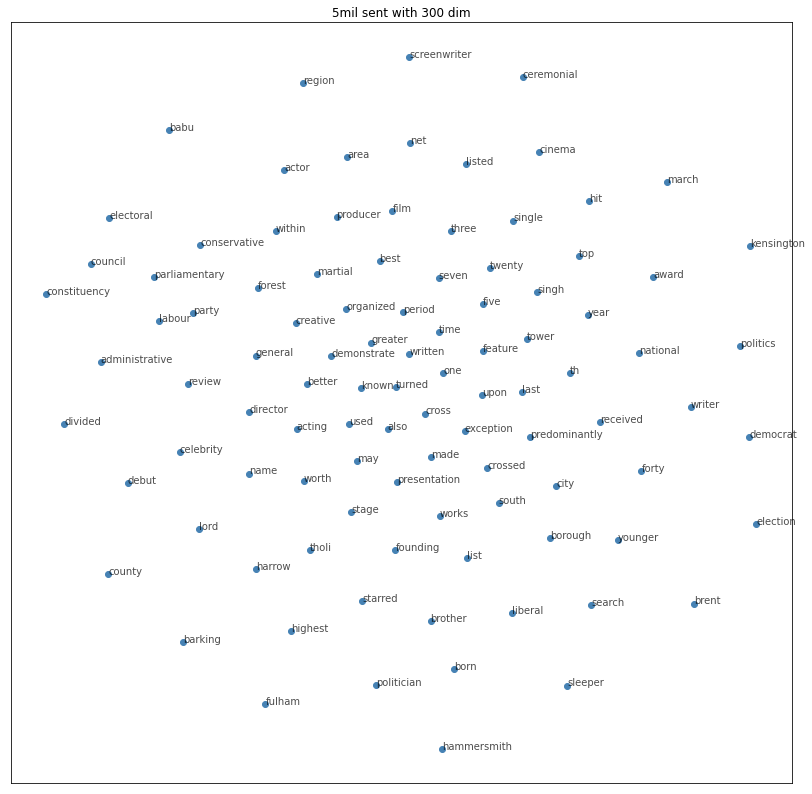

In [9]:
from utils import visualize_embedding, load_pickle
from sklearn.manifold import TSNE
import numpy as np

tsne = TSNE()
dataset = load_pickle('dataset.pkl')
embeddings = np.load('spearman_300_large.npy')
visualize_embedding(embeddings=embeddings, idx2word=dataset.idx2word, num_words=100, title="5mil sent with 300 dim")

# GloVe

## Initialize

In [3]:
%%time
from utils import PreprocessDataGlove
dataset = PreprocessDataGlove("wiki_processed.txt", max_words=10000000)

# of words: 10000023
Vocabulary length: 332770
CPU times: user 1min 3s, sys: 1.74 s, total: 1min 4s
Wall time: 1min 6s


## Train

In [5]:
%%time
import numpy as np
from utils import calc_spearman_coef, save_pickle, weight_func, wmse_loss
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from models import GloveModel

MAX_EPOCH = 500
BATCH_SIZE = 5000
X_MAX = 100
ALPHA = 0.75
n_batches = int(len(dataset.xij) / BATCH_SIZE)
loss_history = list()
spearman_history = list()
EMBED_DIM = 100
DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
best_spearman = 0.0

model = GloveModel(dataset.num_vocab, EMBED_DIM)
model.to(DEVICE)
optimizer = optim.Adagrad(model.parameters(), lr=0.05)


for epoch in range(MAX_EPOCH):
    batch_i = 0

    for x_ij, i_idx, j_idx in dataset.get_batches(BATCH_SIZE):
        x_ij = x_ij.to(DEVICE)
        i_idx = i_idx.to(DEVICE)
        j_idx = j_idx.to(DEVICE)

        batch_i += 1
        
        optimizer.zero_grad()
        
        outputs = model(i_idx, j_idx)
        
        weights_x = weight_func(x_ij, X_MAX, ALPHA).to(DEVICE)
        loss = wmse_loss(weights_x, outputs, torch.log(x_ij)).to(DEVICE)
        
        loss.backward()
        optimizer.step()

        if batch_i % 100 == 0:        
            new_loss = loss.item()
            loss_history.append(new_loss)

            embedding = model.wi.weight.cpu().data.numpy() + model.wj.weight.cpu().data.numpy()
            new_spearman = calc_spearman_coef("/content/combined.csv", dataset.word2idx, embedding) 
            spearman_history.append(new_spearman)

            if new_spearman > best_spearman:
                model.save_embedding(dataset.idx2word, f'glove_{EMBED_DIM}.npy')
                best_spearman = new_spearman 

            print("Epoch: {}/{} \t Batch: {}/{} \t Loss: {} \t Spearman: {}".format(epoch+1, MAX_EPOCH, batch_i, n_batches, new_loss, new_spearman))

save_pickle(f'loss_history_{EMBED_DIM}.pkl', loss_history)
save_pickle(f'spearman_history_{EMBED_DIM}.pkl', spearman_history)

Streaming output truncated to the last 5000 lines.
Epoch: 384/500 	 Batch: 3400/4354 	 Loss: 0.007645464036613703 	 Spearman: 0.35733912267614115
Epoch: 384/500 	 Batch: 3500/4354 	 Loss: 0.007560135331004858 	 Spearman: 0.35744421666982795
Epoch: 384/500 	 Batch: 3600/4354 	 Loss: 0.007522540632635355 	 Spearman: 0.357386684644313
Epoch: 384/500 	 Batch: 3700/4354 	 Loss: 0.00788708683103323 	 Spearman: 0.3574539701155568
Epoch: 384/500 	 Batch: 3800/4354 	 Loss: 0.008123373612761497 	 Spearman: 0.3577971715867736
Epoch: 384/500 	 Batch: 3900/4354 	 Loss: 0.007941116578876972 	 Spearman: 0.3608024030131008
Epoch: 384/500 	 Batch: 4000/4354 	 Loss: 0.007935264147818089 	 Spearman: 0.3578675083998798
Epoch: 384/500 	 Batch: 4100/4354 	 Loss: 0.008383882232010365 	 Spearman: 0.35784168574817055
Epoch: 384/500 	 Batch: 4200/4354 	 Loss: 0.007540945429354906 	 Spearman: 0.35710577934266563
Epoch: 384/500 	 Batch: 4300/4354 	 Loss: 0.007867895066738129 	 Spearman: 0.3575318653199412
Epoch: 

## Test

In [14]:
import numpy as np
from utils import calc_spearman_coef, load_pickle
dataset = load_pickle('/content/drive/MyDrive/glove_result/glove_dataset.pkl')
embeddings = np.load('/content/drive/MyDrive/glove_result/glove_100.npy')
score = calc_spearman_coef("combined.csv", word2idx=dataset.word2idx, embeddings=embeddings)
print("Score: " + str(score))

Score: 0.3074927480335958


## Visualization

### Training graph

Text(0.5, 0, 'Batch')

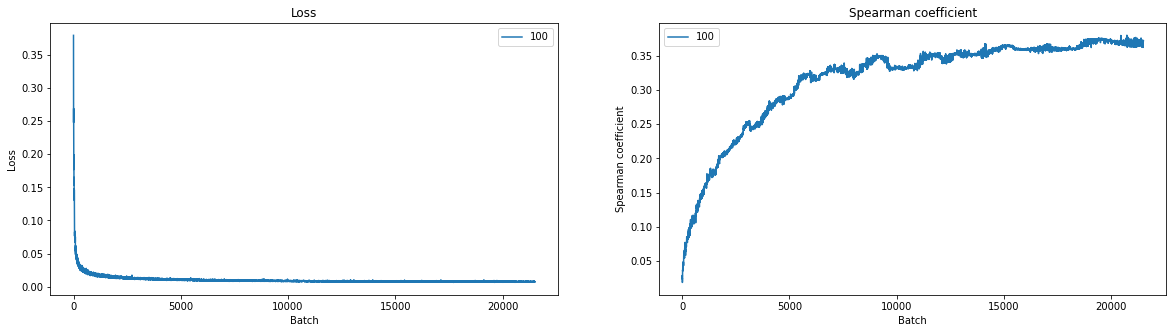

In [13]:
from utils import load_pickle
import matplotlib.pyplot as plt

plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
plt.plot(load_pickle('loss_history_100.pkl'))
plt.legend([100, 200, 300])
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Batch')

plt.subplot(1, 2, 2)
plt.plot(load_pickle('spearman_history_100.pkl'))
plt.legend([100, 200, 300])
plt.title('Spearman coefficient')
plt.ylabel('Spearman coefficient')
plt.xlabel('Batch')

### TSNE

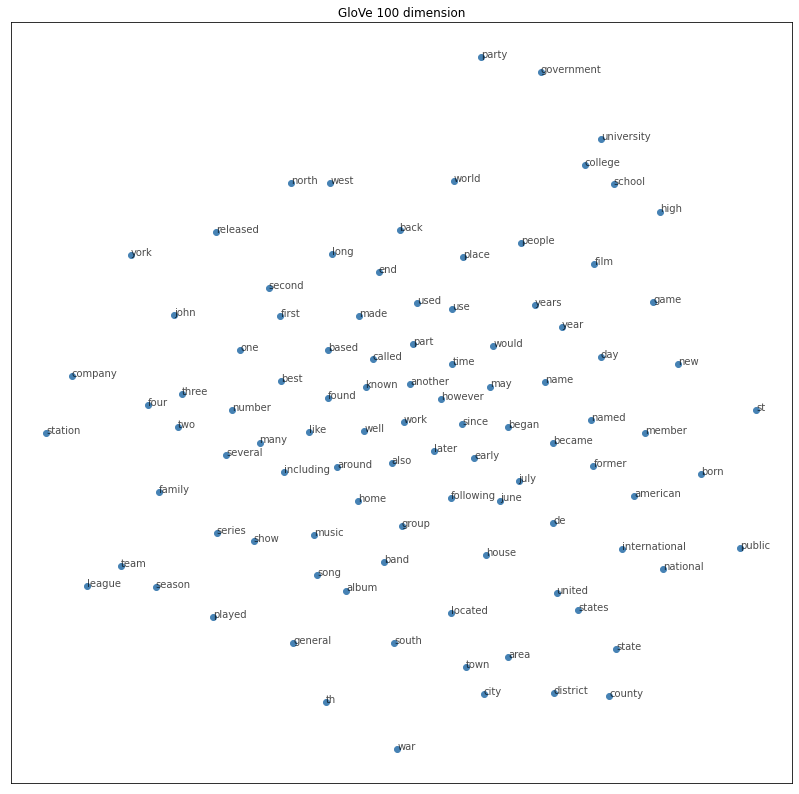

In [18]:
from utils import visualize_embedding, load_pickle
import numpy as np

dataset = load_pickle('glove_dataset.pkl')
embeddings = np.load('glove_100.npy')
visualize_embedding(embeddings=embeddings, idx2word=dataset.idx2word, num_words=100, title="GloVe 100 dimension")